In [1]:
import pandas as pd
import numpy as np
from keras.layers import Input,Dense, Embedding, Flatten, Add, Subtract
from keras.models import Model
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

# Import basketball dataset, create train and test datesets

In [2]:
games_tourney=pd.read_csv('datasets_495447_920088_games_tourney.csv')
games_tourney_train=games_tourney[:3500]
games_tourney_test=games_tourney[3500:]
games_tourney.head()

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won
0,1985,288,73,0,-3,-9,41,50,0
1,1985,5929,73,0,4,6,61,55,1
2,1985,9884,73,0,5,-4,59,63,0
3,1985,73,288,0,3,9,50,41,1
4,1985,3920,410,0,1,-9,54,63,0


# Check unique teams

In [3]:
np.unique(games_tourney_test['team_1'])

array([   67,   173,   174,   175,   249,   316,   317,   318,   319,
         320,   351,   387,   440,   442,   585,   649,   651,   652,
         653,   654,   669,   671,   758,   760,   980,   984,  1009,
        1010,  1041,  1043,  1044,  1045,  1076,  1077,  1134,  1166,
        1167,  1170,  1411,  1475,  1476,  1477,  1478,  1479,  1480,
        1611,  1612,  1704,  1705,  1706,  1708,  1738,  1739,  1808,
        1810,  1907,  1908,  1909,  1912,  1922,  2076,  2078,  2111,
        2112,  2113,  2114,  2145,  2368,  2369,  2370,  2371,  2372,
        2471,  2540,  2639,  2706,  2773,  2776,  2777,  2806,  2807,
        2808,  2811,  2905,  2910,  2977,  3043,  3159,  3160,  3162,
        3196,  3230,  3295,  3296,  3297,  3298,  3299,  3300,  3360,
        3361,  3431,  3432,  3433,  3434,  3469,  3556,  3773,  3845,
        3846,  3848,  3849,  3914,  3917,  3918,  3949,  3950,  3951,
        3982,  3983,  3984,  3985,  3986,  4113,  4143,  4176,  4177,
        4178,  4179,

# Create models layers and tensors

In [4]:
# create input tensor to load 1 column data
input_tensor=Input(shape=(1,), name='Input')
# create embedding layer
embed_layer=Embedding(input_dim=10852, input_length=1, output_dim=1, name='Team-Lookup')
# creatw embedding tensor to apply embedding for input tensor
embed_tensor=embed_layer(input_tensor)
# create flatten tensor to apply flatten for embedding tensor
flatten_tensor=Flatten(name='Flatten')(embed_tensor)

# Define the model with input and output as input tensor and flatten tensor

In [5]:
model=Model(input_tensor,flatten_tensor)

# Show model`s layers

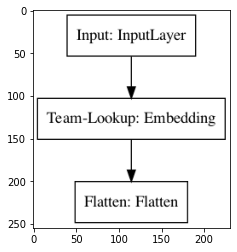

In [6]:
plot_model(model, to_file='model.png')
img=plt.imread('model.png')
plt.imshow(img)
plt.show()

# Compile the model

In [7]:
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 1)]               0         
_________________________________________________________________
Team-Lookup (Embedding)      (None, 1, 1)              10852     
_________________________________________________________________
Flatten (Flatten)            (None, 1)                 0         
Total params: 10,852
Trainable params: 10,852
Non-trainable params: 0
_________________________________________________________________


# Model fitting

In [8]:
model.fit(games_tourney_train['team_1'],games_tourney_train['score_diff'], epochs=1, batch_size=64, validation_split=0.2, verbose=True)

44/44 [==============================] - 0s 3ms/step - loss: 11.6853 - val_loss: 12.0474


# Model evaluation

In [9]:
model.evaluate(games_tourney_test['team_1'],games_tourney_test['score_diff'])

23/23 [==============================] - 0s 468us/step - loss: 11.3593


11.359286308288574

#####################################################################################################################

# Building Model1 with 2 inputs and re-used previous Model

## create model1`s layers and tensors

In [10]:
# first input tensor
input_tensor1=Input(shape=(1,))
# second input tensor
input_tensor2=Input(shape=(1,))
# re-using Model
inp1=model(input_tensor1)
inp2=model(input_tensor2)
# score tensor that substract 2 re-used inputs
score_diff=Add()([inp1,inp2])

# Define the Model1 with 2 inputs and score tensor 

In [11]:
model1=Model([input_tensor1,input_tensor2], score_diff)

# Show model1`s layers

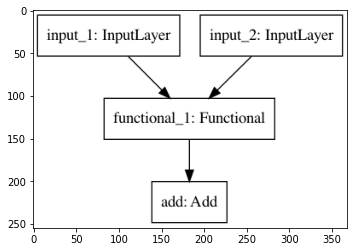

In [12]:
plot_model(model1, to_file='model1.png')
img=plt.imread('model1.png')
plt.imshow(img)
plt.show()

# Compile model1

In [13]:
model1.compile(optimizer='adam', loss='mean_absolute_error')
model1.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
functional_1 (Functional)       (None, 1)            10852       input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
add (Add)                       (None, 1)            0           functional_1[0][0]    

# Model1`s fitting

In [14]:
model1.fit([games_tourney_train['team_1'],games_tourney_train['team_2']],games_tourney_train['score_diff'], epochs=1, batch_size=2048, validation_split=0.1, verbose=True)

2/2 [==============================] - 0s 46ms/step - loss: 11.8590 - val_loss: 10.8557


# Model1`s evaluation

In [15]:
model1.evaluate([games_tourney_test['team_1'],games_tourney_test['team_2']],games_tourney_test['score_diff'])

23/23 [==============================] - 0s 615us/step - loss: 11.3595


11.359532356262207